In [333]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

import re

In [334]:


# Informations de connexion à la base de données RDS
endpoint = 'database-datacoders.c3m48simgdzn.eu-west-3.rds.amazonaws.com'
username = 'admin'
password = 'dataCoders2024+'
database_name = 'db_datacoders'
port = 3306  # Le port par défaut pour MySQL est 3306

# Création de la connexion
conn = mysql.connector.connect(
    host=endpoint,
    user=username,
    passwd=password,
    database=database_name,
    port=port
)

# Création d'un curseur
cursor = conn.cursor()

# Exemple d'exécution d'une requête SQL
cursor.execute('''
               SELECT * 
               FROM user_info as ui
               LEFT JOIN login_user as lu USING (id_login_user)
               LEFT JOIN mentor_sujet as ms ON (lu.id_login_user = ms.id_mentor)
               LEFT JOIN mentorat as mt ON (mt.id_mentorat = ms.id_mentorat)
               LEFT JOIN sujet as sj ON (lu.id_login_user = sj.id_utilisateur_mentoret)
               LEFT JOIN calendrier as c ON (lu.id_login_user = c.id_utilisateur_mentoret)
               ''')
rows = cursor.fetchall()

# # Affichage des résultats
# for row in rows[:20]:
#     print(row)



column_names = [desc[0]+str(i) for desc, i in zip(cursor.description, range(len(cursor.description)))]
print(column_names)

# Création du DataFrame pandas avec noms de colonnes préfixés par les noms des tables
# column_names_prefixed = [f"{table}_{column}" if table else column for table, column in zip(table_names, column_names)]
df = pd.DataFrame(rows, columns=column_names)

# Fermeture du curseur et de la connexion
cursor.close()
conn.close()


# enregistrer au format parquet
df.to_parquet('user_info.parquet', index=False)

['id_login_user0', 'id_user_info1', 'prenom2', 'nom3', 'sexe4', 'age5', 'mentor6', 'lgbt7', 'handicap8', 'type_handicap9', 'niveau_professionnel10', 'categorie_socio_professionel11', 'nombre_de_participation12', 'id_mentorat13', 'email14', 'mot_de_passe15', 'created_at16', 'last_connection_at17', 'id_mentor18', 'id_mentorat19', 'id_mentorat20', 'type_mentorat21', 'id_sujet22', 'id_mentorat23', 'id_utilisateur_mentor24', 'id_utilisateur_mentoret25', 'sujet_du_mentorat26', 'created_at27', 'updated_at28', 'id_utilisateur_mentor29', 'id_utilisateur_mentoret30', 'id_mentorat31', 'created_at32', 'updated_at33']


In [335]:
df = pd.read_parquet(r'C:\Users\dimle\Documents\clone_repo\HackathonWCS\ML\user_info.parquet')

df

,id_login_user0,id_user_info1,prenom2,nom3,sexe4,age5,mentor6,lgbt7,handicap8,type_handicap9,niveau_professionnel10,categorie_socio_professionel11,nombre_de_participation12,id_mentorat13,email14,mot_de_passe15,created_at16,last_connection_at17,id_mentor18,id_mentorat19,id_mentorat20,type_mentorat21,id_sujet22,id_mentorat23,id_utilisateur_mentor24,id_utilisateur_mentoret25,sujet_du_mentorat26,created_at27,updated_at28,id_utilisateur_mentor29,id_utilisateur_mentoret30,id_mentorat31,created_at32,updated_at33
0,NaN,0,Chris,Kate,Autre,2024,0,Oui,0,,debutant,Étudiant,NaN,None,None,None,NaT,NaT,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1,789.0,789,Mary,Martin,Agender,24,1,Yes,0,None,Senior,Sans activité professionnelle,14.0,None,erik35@example.com,_MPtE&elu8,2024-07-04 10:05:32,2024-07-04 10:05:32,789.0,4.0,4.0,mentorat pour jeune diplomé ou étudiant,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
2,789.0,789,Mary,Martin,Agender,24,1,Yes,0,None,Senior,Sans activité professionnelle,14.0,None,erik35@example.com,_MPtE&elu8,2024-07-04 10:05:32,2024-07-04 10:05:32,789.0,1.0,1.0,mentorat pour femme,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
3,790.0,790,William,Jones,Agender,46,1,Yes,0,None,Jeune diplômé,Agriculteur,8.0,None,harpersabrina@example.com,g_7CW_Vy9n,2024-07-04 10:05:32,2024-07-04 10:05:32,790.0,2.0,2.0,mentorat pour membre lgbt+,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
4,790.0,790,William,Jones,Agender,46,1,Yes,0,None,Jeune diplômé,Agriculteur,8.0,None,harpersabrina@example.com,g_7CW_Vy9n,2024-07-04 10:05:32,2024-07-04 10:05:32,790.0,1.0,1.0,mentorat pour femme,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1785.0,1785,Monica,Meyers,Transgender Male,27,1,No,1,Auditif,Actif,Agriculteur,3.0,None,stacyoconnell@example.org,_DUsNsDx!1,2024-07-04 10:05:56,2024-07-04 10:05:56,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1540,1786.0,1786,Ruth,Ford,Agender,40,0,No,0,None,Jeune diplômé,Commerçant,7.0,None,sarah73@example.com,#YO@l1vIm4,2024-07-04 10:05:56,2024-07-04 10:05:56,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaT,NaT,1516.0,1786.0,3.0,2024-07-04 10:05:57,2024-07-04 10:05:57
1541,1787.0,1787,Courtney,Shah,Genderqueer,62,1,Yes,0,None,Actif,Employé,2.0,None,blackmonica@example.com,$4aH@lQ^$T,2024-07-04 10:05:56,2024-07-04 10:05:56,1787.0,3.0,3.0,mentorat pour person à handicape,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1542,1787.0,1787,Courtney,Shah,Genderqueer,62,1,Yes,0,None,Actif,Employé,2.0,None,blackmonica@example.com,$4aH@lQ^$T,2024-07-04 10:05:56,2024-07-04 10:05:56,1787.0,4.0,4.0,mentorat pour jeune diplomé ou étudiant,NaN,NaN,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT


In [336]:
pd.set_option("display.max_columns", None)

In [337]:
# clean du df pour le ML
df.drop(columns=[
                 'id_user_info1', 
                 'prenom2',	
                 'nom3',	
                 'age5',
                 'nombre_de_participation12',	
                 'id_mentorat13',	
                 'email14',	
                 'mot_de_passe15',	
                 'created_at16'	,
                 'last_connection_at17',
                 'id_mentorat20',
                 'created_at27',	
                 'updated_at28',
                 'created_at32',	
                 'updated_at33',
                  'id_utilisateur_mentor29',	
                  'id_utilisateur_mentoret30',	
                  'id_mentorat31',
                  'id_mentorat23'	,
                  'id_utilisateur_mentor24',	
                  'sujet_du_mentorat26',
                  'id_utilisateur_mentoret25'
                  
                 ], inplace=True)

In [338]:
df

,id_login_user0,sexe4,mentor6,lgbt7,handicap8,type_handicap9,niveau_professionnel10,categorie_socio_professionel11,id_mentor18,id_mentorat19,type_mentorat21,id_sujet22
0,NaN,Autre,0,Oui,0,,debutant,Étudiant,NaN,NaN,None,NaN
1,789.0,Agender,1,Yes,0,None,Senior,Sans activité professionnelle,789.0,4.0,mentorat pour jeune diplomé ou étudiant,NaN
2,789.0,Agender,1,Yes,0,None,Senior,Sans activité professionnelle,789.0,1.0,mentorat pour femme,NaN
3,790.0,Agender,1,Yes,0,None,Jeune diplômé,Agriculteur,790.0,2.0,mentorat pour membre lgbt+,NaN
4,790.0,Agender,1,Yes,0,None,Jeune diplômé,Agriculteur,790.0,1.0,mentorat pour femme,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1785.0,Transgender Male,1,No,1,Auditif,Actif,Agriculteur,NaN,NaN,None,NaN
1540,1786.0,Agender,0,No,0,None,Jeune diplômé,Commerçant,NaN,NaN,None,NaN
1541,1787.0,Genderqueer,1,Yes,0,None,Actif,Employé,1787.0,3.0,mentorat pour person à handicape,NaN
1542,1787.0,Genderqueer,1,Yes,0,None,Actif,Employé,1787.0,4.0,mentorat pour jeune diplomé ou étudiant,NaN


In [339]:
# remplacement desq oui par Yes
df['lgbt7'] = df['lgbt7'].apply(lambda x: 0 if x =='No' else 1 )

In [340]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1544   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA    ┃ NA %    ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p50   ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ id_login_user0    │     1 │    0.06 │     1269 │    289.7 │  789 │   1016 │  1249 │   1528 │ 1788 │ ▇▇▇▇▇▇ │  │
│ │ mentor6           │     0 │       0 │   0.4437 │    0.497 │    0 │      0 │     0 │      1 │    1 │ ▇    ▆ │  │
│ │ lgbt7             │     0 │       0 │   0.5162 │   0.4999 │    0 │      0 │     1 │      1 │    1 │ ▇    ▇ │  │
│ │ handicap8         │     0 │       0 │   0.5084 │   0.5001 │    0 │      0 │     1 │      1 │    1 │ ▇    ▇ │  │
│ │ id_mentor18       │  1044 │   67.62 │     1268 │      291 │  789 │  993.2 │  1239 │   1524 │ 1787 │ ▇▇▇▅▇▆ │  │
│ │ id_mentorat19     │  1044 │   67.62 │    2.938 │    1.373 │    1 │      2 │     3 │      4 │    5 │ ▆▇ ▆▇▆ │  │
│ │ id_sujet22        │  1094 │   70.85 │    148.3 │     88.6 │    1 │     67 │   148 │  225.8 │  300 │ ▇▇▆▆▇▇ │  │
│ └───────────────────┴───────┴─────────┴──────────┴──────────┴──────┴────────┴───────┴────────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sexe4                               │        0 │          0 │                     1.2 │               1862 │  │
│ │ type_handicap9                      │      758 │      49.09 │                    0.51 │                786 │  │
│ │ niveau_professionnel10              │        0 │          0 │                     1.3 │               1952 │  │
│ │ categorie_socio_professionel11      │        0 │          0 │                     1.3 │               1936 │  │
│ │ type_mentorat21                     │     1044 │      67.62 │                     1.3 │               2049 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [341]:
# nettoyage des doublons
df = df[~df.duplicated()] 

In [342]:
# suppression NA pour id_login_user0

df = df.dropna(subset=['id_login_user0'])

In [343]:
# remplacement des NA pour les idmentor si mentor = false alors 99999

df['id_mentor18'] = df['id_mentor18'].fillna(99999)
df['id_mentorat19'] = df['id_mentorat19'].fillna(99999)
df['id_sujet22'] = df['id_sujet22'].fillna(99999)


In [344]:
df['type_handicap9'] = df['type_handicap9'].fillna('')
df['type_mentorat21'] = df['type_mentorat21'].fillna('')

In [345]:
# modification des totre de colonne pour sup le chiffre

df.rename(columns=lambda x: re.sub(r'\d+$', '', x),
          inplace=True)


In [346]:
# transformation des bool
df['lgbt'] = df['lgbt'].astype(bool)
df['mentor'] = df['mentor'].astype(bool)
df['handicap'] = df['handicap'].astype(bool)

In [347]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1215   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id_login_user    │   0 │     0 │    1279 │  289.6 │  789 │    1026 │    1270 │    1532 │    1788 │ ▇▇▇▇▇▇  │  │
│ │ id_mentor        │   0 │     0 │   62700 │  47890 │  789 │    1454 │  100000 │  100000 │  100000 │ ▅    ▇  │  │
│ │ id_mentorat      │   0 │     0 │   62220 │  48500 │    1 │       4 │  100000 │  100000 │  100000 │ ▅    ▇  │  │
│ │ id_sujet         │   0 │     0 │   75350 │  43070 │    1 │  100000 │  100000 │  100000 │  100000 │ ▃    ▇  │  │
│ └──────────────────┴─────┴───────┴─────────┴────────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mentor                             │             644 │                          0.53 │       ▇    ▇        │  │
│ │ lgbt                               │             632 │                          0.52 │       ▇    ▇        │  │
│ │ handicap                           │             606 │                           0.5 │       ▇    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sexe                                  │     0 │         0 │                      1.2 │                1465 │  │
│ │ type_handicap                         │     0 │         0 │                        1 │                1215 │  │
│ │ niveau_professionnel                  │     0 │         0 │                      1.3 │                1532 │  │
│ │ categorie_socio_professionel          │     0 │         0 │                      1.3 │                1548 │  │
│ │ type_mentorat                         │     0 │     

In [348]:
df

,id_login_user,sexe,mentor,lgbt,handicap,type_handicap,niveau_professionnel,categorie_socio_professionel,id_mentor,id_mentorat,type_mentorat,id_sujet
1,789.0,Agender,True,True,False,,Senior,Sans activité professionnelle,789.0,4.0,mentorat pour jeune diplomé ou étudiant,99999.0
2,789.0,Agender,True,True,False,,Senior,Sans activité professionnelle,789.0,1.0,mentorat pour femme,99999.0
3,790.0,Agender,True,True,False,,Jeune diplômé,Agriculteur,790.0,2.0,mentorat pour membre lgbt+,99999.0
4,790.0,Agender,True,True,False,,Jeune diplômé,Agriculteur,790.0,1.0,mentorat pour femme,99999.0
5,791.0,Intersex,False,True,False,,Actif,Commerçant,99999.0,99999.0,,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1785.0,Transgender Male,True,False,True,Auditif,Actif,Agriculteur,99999.0,99999.0,,99999.0
1540,1786.0,Agender,False,False,False,,Jeune diplômé,Commerçant,99999.0,99999.0,,99999.0
1541,1787.0,Genderqueer,True,True,False,,Actif,Employé,1787.0,3.0,mentorat pour person à handicape,99999.0
1542,1787.0,Genderqueer,True,True,False,,Actif,Employé,1787.0,4.0,mentorat pour jeune diplomé ou étudiant,99999.0


In [349]:
#observation des categorie

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].nunique())
        print()  # Print a new line for better readability



Value counts for column 'sexe':
9

Value counts for column 'type_handicap':
6

Value counts for column 'niveau_professionnel':
4

Value counts for column 'categorie_socio_professionel':
10

Value counts for column 'type_mentorat':
6



In [350]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].unique())
        print()

Value counts for column 'sexe':
['Agender' 'Intersex' 'Genderfluid' 'Non_binary' 'Female'
 'Transgender Female' 'Genderqueer' 'Male' 'Transgender Male']

Value counts for column 'type_handicap':
['' 'Auditif' 'Visuel' 'Autre' 'Physique' 'Mental']

Value counts for column 'niveau_professionnel':
['Senior' 'Jeune diplômé' 'Actif' 'Étudiant']

Value counts for column 'categorie_socio_professionel':
['Sans activité professionnelle' 'Agriculteur' 'Commerçant' 'Cadre'
 'Artisan' 'Retraité' 'Ouvrier' 'Profession libérale' 'Employé' 'Étudiant']

Value counts for column 'type_mentorat':
['mentorat pour jeune diplomé ou étudiant' 'mentorat pour femme'
 'mentorat pour membre lgbt+' '' 'mentorat pour person à handicape'
 'mentorat interculturel']



In [351]:
dict_clean = {}


for col in df.columns:
    if df[col].dtype == 'object':
        dict_clean[col] = df[col].value_counts()

C:\Users\dimle\AppData\Local\Temp\ipykernel_13392\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_13392\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_13392\2644374535.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_13392\2644374535.py:12: UserWarning: set_ticklabels() should o

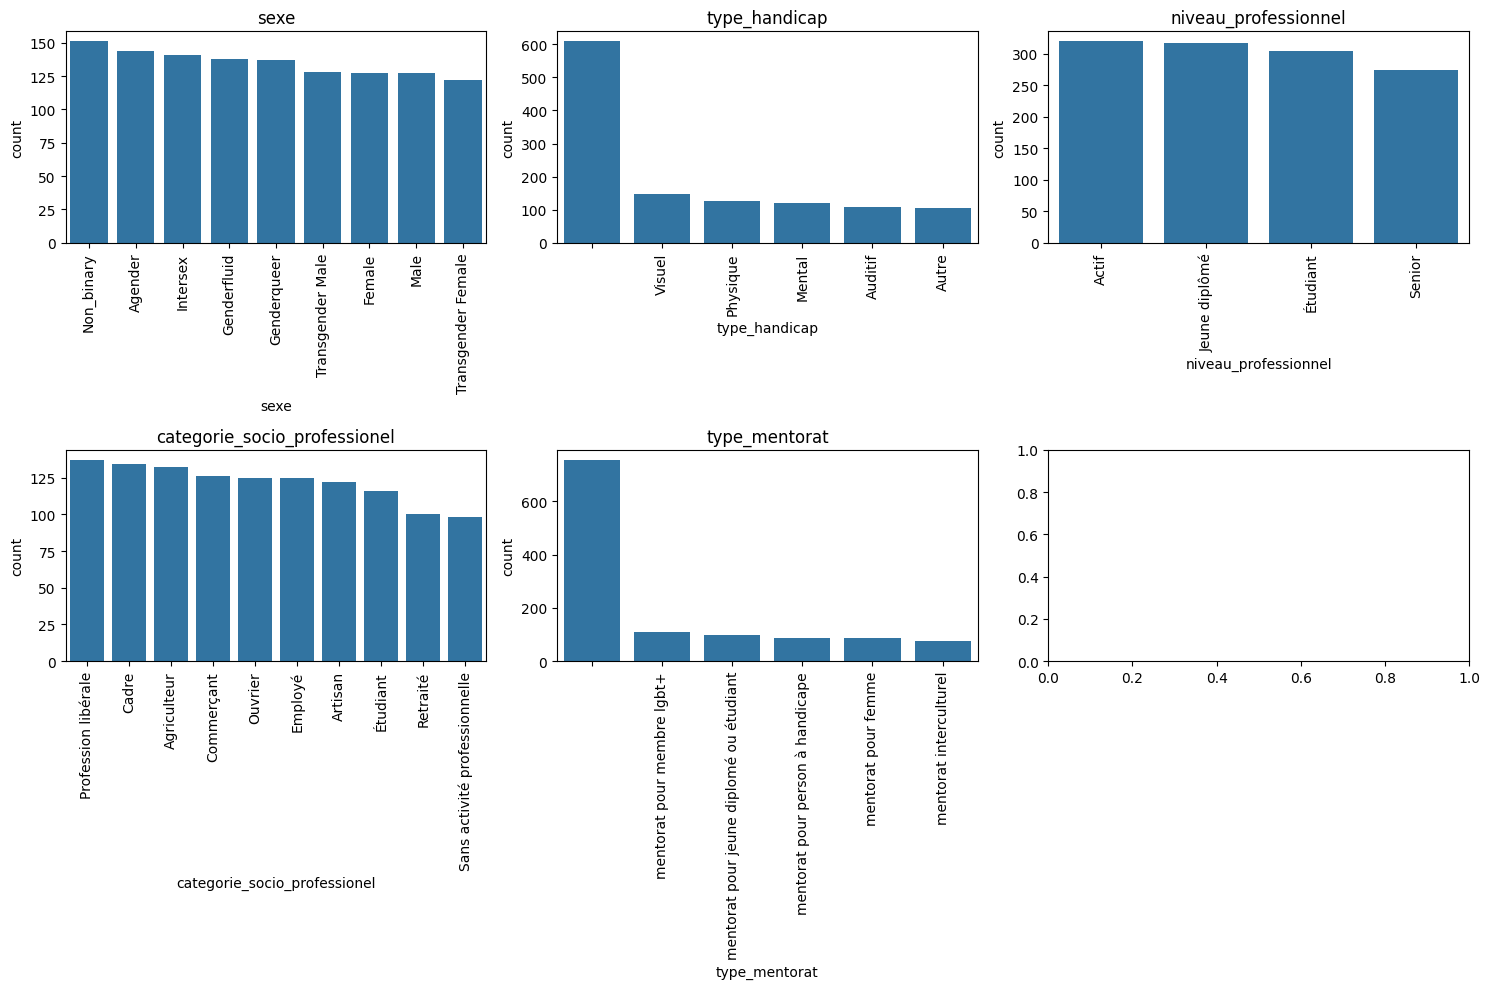

In [352]:
i= 0
nb_col = 3
nb_lig = 2
colonne = df.columns

fig, axes = plt.subplots(nb_lig, nb_col, figsize=(15,10))

for k, v in dict_clean.items():
    sns.barplot(dict_clean[k], ax= axes[i//nb_col, i%nb_col])
    axes[i//nb_col, i%nb_col].set_title(k)
    axes[i//nb_col, i%nb_col].set_ylabel('count')
    axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
    i += 1


plt.tight_layout()
plt.show()

In [353]:
# enregistrement du df clean en parquet
df.to_parquet('user_info_clean.parquet', index=False)